In [3]:
import os
from bluesky import RunEngine
from raypyng_bluesky.RaypyngOphydDevices import RaypyngOphydDevices

RE = RunEngine({})

# Send all metadata/data captured to the BestEffortCallback.
from bluesky.callbacks.best_effort import BestEffortCallback
bec = BestEffortCallback()


# # Make plots update live while scans run.
# from bluesky.utils import install_kicker
# install_kicker()

# create a temporary database
from databroker import Broker
db = Broker.named('temp')
RE.subscribe(db.insert)
RE.subscribe(bec)

# import the magics
from bluesky.magics import BlueskyMagics
get_ipython().register_magics(BlueskyMagics)

# import plans
from bluesky.plans import (
    relative_scan as dscan,
    scan, scan as ascan,
    list_scan,
    rel_list_scan,
    rel_grid_scan,  rel_grid_scan as dmesh,
    list_grid_scan,
    adaptive_scan,
    rel_adaptive_scan,
    inner_product_scan            as a2scan,
    relative_inner_product_scan   as d2scan,
    tweak)

# import stubs
from bluesky.plan_stubs import (
    abs_set,rel_set,
    mv, mvr,
    trigger,
    read, rd,
    stage, unstage,
    configure,
    stop)

In [4]:
# insert here the path to the rml file that you want to use
rml_folder = '../rml'
rml_name = '../rml/elisa.rml'
rml_path = os.path.join(rml_folder,rml_name)

RaypyngOphydDevices(RE=RE, rml_path=rml_path, temporary_folder=None, name_space=None, prefix=None, ray_ui_location=None)

In [11]:
rp_Dipole.component_names

('en', 'nrays', 'bandwidth')

In [10]:
rp_Dipole.read()

OrderedDict([('rp_Dipole_en_setpoint',
              {'value': 1000.0, 'timestamp': 1706200634.2341456}),
             ('rp_Dipole_en',
              {'value': 1000.0, 'timestamp': 1706200634.2341683}),
             ('rp_Dipole_nrays_setpoint',
              {'value': 100000.0, 'timestamp': 1706200634.2342644}),
             ('rp_Dipole_nrays',
              {'value': 100000.0, 'timestamp': 1706200634.234287}),
             ('rp_Dipole_bandwidth_setpoint',
              {'value': 0.1, 'timestamp': 1706200634.2345407}),
             ('rp_Dipole_bandwidth',
              {'value': 0.1, 'timestamp': 1706200634.2345495})])

In [14]:
rp_Dipole.nrays.get()

100000.0

In [18]:
rp_Dipole.nrays.set(1000)
rp_Dipole.nrays.get()

1000.0



Transient Scan ID: 2     Time: 2024-01-25 17:41:54
Persistent Unique Scan ID: 'bd35a272-dc12-4f88-ba72-914d03d583b4'
New stream: 'primary'
+-----------+------------+--------------+---------------------------------------+
|   seq_num |       time | rp_Dipole_en | rp_DetectorAtFocus_intensity[photons] |
+-----------+------------+--------------+---------------------------------------+
|         1 | 17:41:55.5 |      200.000 |                      234618120000.000 |
|         2 | 17:41:56.1 |      400.000 |                      330819300000.000 |
|         3 | 17:41:56.7 |      600.000 |                      365776800000.000 |
|         4 | 17:41:57.3 |      800.000 |                      710368410000.000 |
|         5 | 17:41:57.8 |     1000.000 |                      541420560000.000 |
|         6 | 17:41:58.5 |     1200.000 |                      549015000000.000 |
|         7 | 17:41:59.2 |     1400.000 |                      530355000000.000 |
|         8 | 17:42:00.2 |     1600.000

('bd35a272-dc12-4f88-ba72-914d03d583b4',)

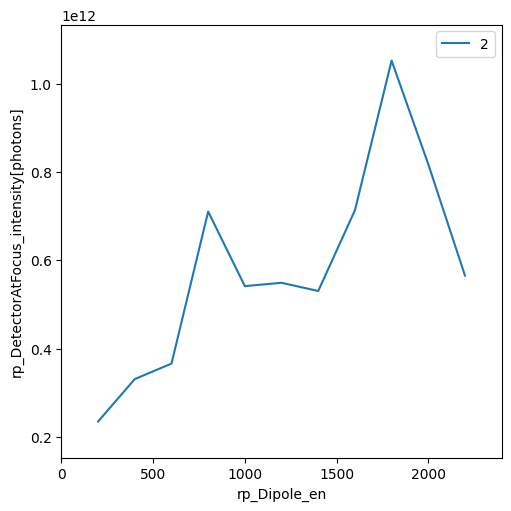

In [19]:
RE(scan([rp_DetectorAtFocus.intensity], rp_Dipole.en, 200, 2200, 11))